# What is the top demanded product in the store ?

### Methodology

1. Group by product name
2. Calculted orders count
3. Sort in descending 
4. Extract top 10 rows
5. Plot final findings

## Import Libraris and Data

In [16]:
# Importing libraris ill use
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import calendar
import humanize


# TODO : Loading the data
data = pd.read_csv('data/superstore.csv' , encoding='latin1')

## Data Cleaning

In [17]:

# TODO : Data Cleaning Phase + managing types
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

col_to_categorize = ['Ship Mode' , 'Sub-Category' , 'Category' , 'Region' , 'Segment' , 'State']
for col in col_to_categorize:
    data[col] = data[col].astype('category')

# Treat duplicate rows
duplicated_sum = data.duplicated().sum()
if duplicated_sum > 0 :
    data.drop_duplicates(inplace=True)

most_occurent_ship_mode = data['Ship Mode'].mode()[0]
most_occurent_segment = data['Segment'].mode()[0]

data['Ship Mode'] = data['Ship Mode'].fillna(most_occurent_ship_mode)
data['Segment'] = data['Segment'].fillna(most_occurent_segment)

# Check if any discounts higher then 1
discount_higher_then_01 = (data['Discount'] > 1).sum()
if discount_higher_then_01 >= 1:
    print("Discount Higher then 1 founded and fixed")
    data['Discount'] = np.where(data['Discount'] > 1 , data['Discount'].median() , data['Discount'])


Discount Higher then 1 founded and fixed


## Engineering Features

In [18]:
# TODO : Engineering features
months = list(calendar.month_name)[1:]
data['Year'] = data['Order Date'].dt.strftime("%Y")
data['Month'] = data['Order Date'].dt.strftime("%B")
# Convert Month column to an ordered categorical type
data['Month'] = pd.Categorical(data['Month'] , categories=months , ordered=True)
data.set_index("Row ID" , inplace=True)


# Sort Columns
data.sort_values(by='Year' , ascending=False , inplace=True)

## The Analysis

## The Top States
To make this analysis i first grouped by the `Product Name` and using `size()` function that return the size of each group i counted the total orders count , then i sorted the result by the total orders count and finally extrated the top 10 rows.

In [19]:
orders_per_product = data.groupby(by='Product Name' , observed=False).size()
orders_per_product.sort_values(ascending=False , inplace=True)
most_demanded_product = orders_per_product.head(10)
most_demanded_product

Product Name
Staple envelope                               48
Staples                                       46
Easy-staple paper                             46
Avery Non-Stick Binders                       20
Staples in misc. colors                       19
Staple remover                                18
KI Adjustable-Height Table                    18
Storex Dura Pro Binders                       17
Staple-based wall hangings                    16
Situations Contoured Folding Chairs, 4/Set    15
dtype: int64

## Plotting

Created a bar chart to visualize the 10 most demanded product

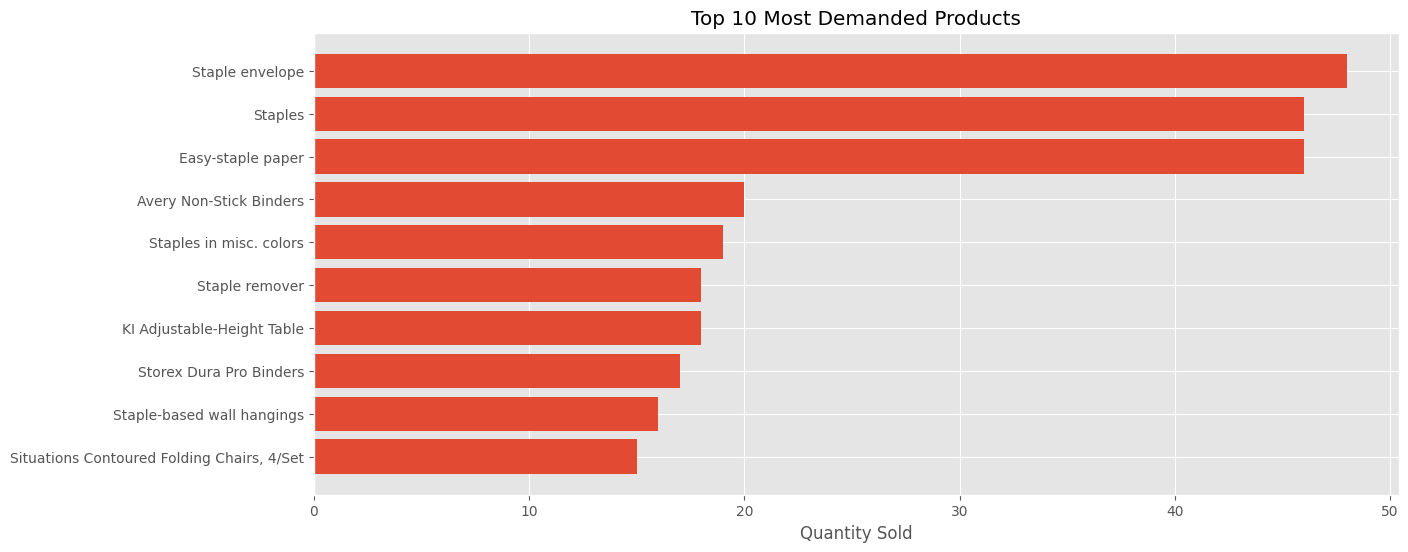

In [20]:
plt.style.use('ggplot')
plt.figure(figsize=(14,6))
plt.barh(most_demanded_product.index, most_demanded_product.values)
plt.xlabel('Quantity Sold')
plt.title('Top 10 Most Demanded Products')
plt.gca().invert_yaxis()  # convert the largest on top
plt.savefig("figures/question_1_fig.png") 
plt.show()